bbox_bengin:  Tensor("SampleDistortedBoundingBox:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox:1", shape=(3,), dtype=int32)


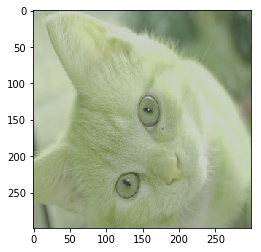

bbox_bengin:  Tensor("SampleDistortedBoundingBox_1:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox_1:1", shape=(3,), dtype=int32)


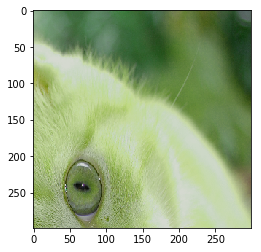

bbox_bengin:  Tensor("SampleDistortedBoundingBox_2:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox_2:1", shape=(3,), dtype=int32)


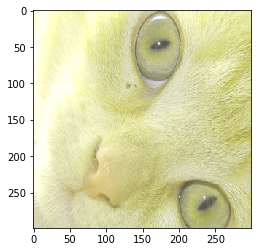

bbox_bengin:  Tensor("SampleDistortedBoundingBox_3:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox_3:1", shape=(3,), dtype=int32)


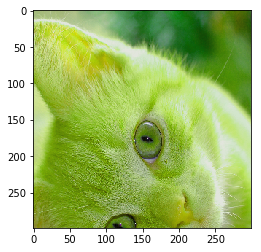

bbox_bengin:  Tensor("SampleDistortedBoundingBox_4:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox_4:1", shape=(3,), dtype=int32)


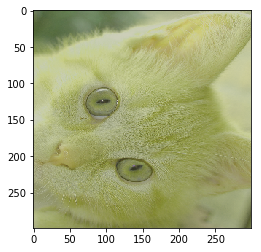

bbox_bengin:  Tensor("SampleDistortedBoundingBox_5:0", shape=(3,), dtype=int32)  ,bbox_size:  Tensor("SampleDistortedBoundingBox_5:1", shape=(3,), dtype=int32)


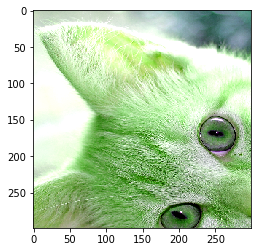

In [16]:
# 图像处理完成实例

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 随机调整一张图片的色彩
# 因为调整亮度，对比度，饱和度，色相的顺序会影响最后得到的结果，所以可以定义多长不同的顺序
# 可以在训练数据预处理时随机选择一种，这样可以进一步降低无关因素对模型的影响
def distort_color(image, color_ordering=0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    else:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
    return tf.clip_by_value(image, 0.0, 1.0)

# 对图片进行预处理，转化成神经网络的输入层数据
# 输入参数：一张解码后的图像、目标图像的尺寸以及图像上的标注框
def preprocess_for_train(image, height, width, bbox):
    # 如果没有提供标注框，则认为整个图像就是需要关注的部分
    if bbox is None:
        bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
        
    # 转换图像张量的类型
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        
    # 随机截取图像，减小需要关注的物体大小对图像识别算法的影响
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(tf.shape(image), bounding_boxes=bbox)
    print "bbox_bengin: ", bbox_begin, " ,bbox_size: ", bbox_size
    distorted_image = tf.slice(image, bbox_begin, bbox_size)
    
    # 将随机截取的图像调整为神经网络的输入层的大小。大小调整的算法是随机的
    distorted_image = tf.image.resize_images(distorted_image, height, width, method=np.random.randint(4))
    
    # 随机左右翻转图像
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    
    # 使用一种随机的顺序调整图像色彩
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    
    return distorted_image

image_raw_data = tf.gfile.FastGFile("/Users/xxx/Documents/shell/datasets/cat.jpg", 'r').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    bboxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # 运行6次获得6中不同的图像
    for i in range(6):
        # 将图像的尺寸调整为299*299
        img_data_bbox = preprocess_for_train(img_data, 299, 299, bboxes)
        plt.imshow(img_data_bbox.eval())
        plt.show()
    
    


